### Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.count()

YearsExperience    30
Salary             30
dtype: int64

In [8]:
df=df.rename(columns={'YearsExperience':'experience','Salary':'salary'})

In [9]:
df.head()

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


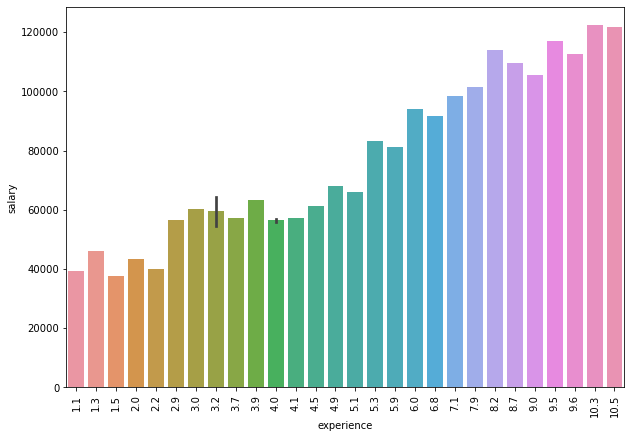

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x="experience",y="salary",data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='experience', ylabel='Density'>

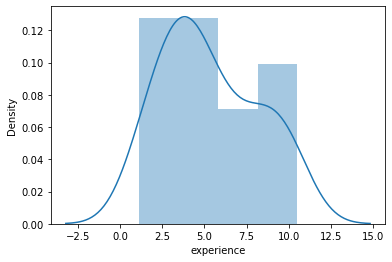

In [11]:
sns.distplot(df['experience'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

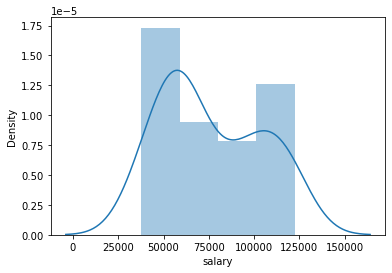

In [12]:
sns.distplot(df['salary'])

In [13]:
df.corr()

,experience,salary
experience,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='experience', ylabel='salary'>

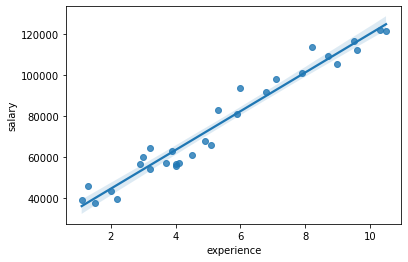

In [14]:
sns.regplot(x='experience',y='salary',data=df)

<AxesSubplot:xlabel='salary', ylabel='experience'>

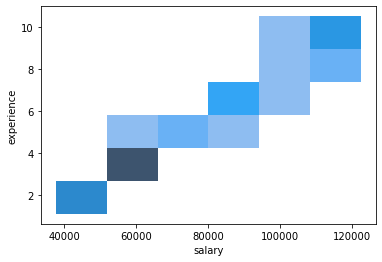

In [15]:
sns.histplot(x="salary",y="experience",data=df)

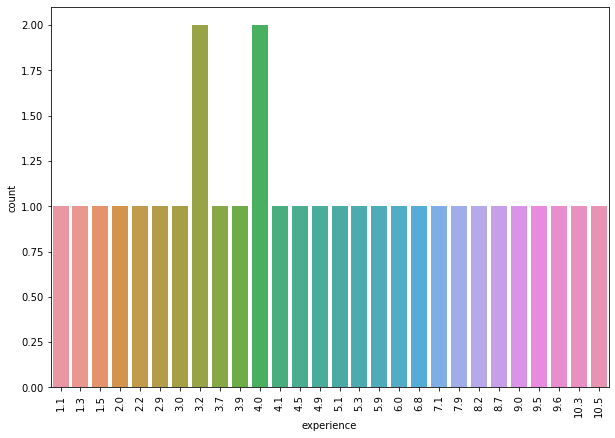

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['experience'])
plt.xticks(rotation=90)
plt.show()

In [17]:
model=smf.ols("salary~experience",data=df).fit() # Ordinary least square

In [18]:
model.params

Intercept     25792.200199
experience     9449.962321
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        08:17:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.pvalues

Intercept     5.511950e-12
experience    1.143068e-20
dtype: float64

In [21]:
model.tvalues

Intercept     11.346940
experience    24.950094
dtype: float64

In [22]:
pred=model.predict(df.experience)

In [23]:
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

<AxesSubplot:ylabel='Density'>

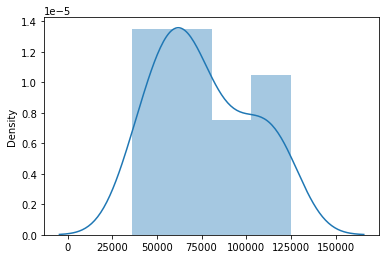

In [24]:
sns.distplot(pred)

In [25]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [26]:
 model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

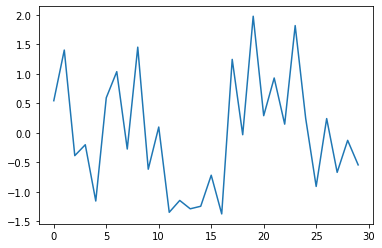

In [27]:
plt.plot(model.resid_pearson)

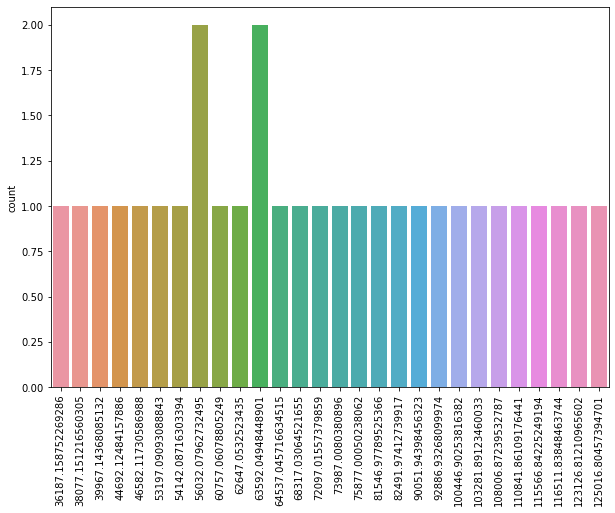

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(pred)
plt.xticks(rotation=90)
plt.show()

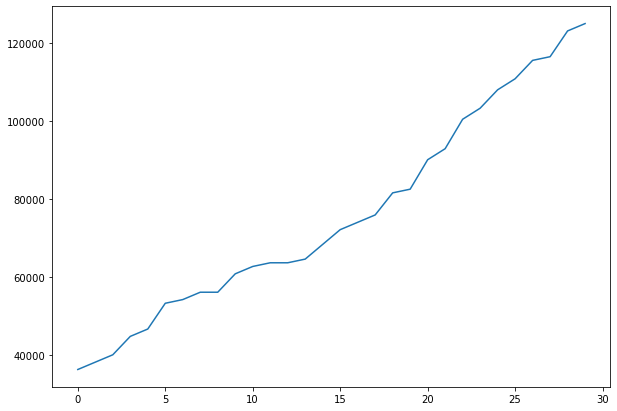

In [29]:
plt.figure(figsize=(10,7))
plt.plot(pred)

### Transformations

In [ ]:
# Log transformation
model_log=smf.ols("salary~np.log(experience)",data=df).fit()
pred_log=model_log.predict(df.experience)
rmse_log=np.sqrt(np.mean((df.salary-pred_log)**2))

In [32]:
# Square transformation
model_sq=smf.ols("salary~experience**2",data=df).fit()
pred_sq = model_sq.predict(df.experience)
rmse_sq = np.sqrt(np.mean((df.salary - pred_sq)**2))

In [33]:
# Square root transformation
model_sqrt=smf.ols("salary~ np.sqrt(experience)", data=df).fit()
pred_sqrt=model_sqrt.predict(df.experience)
rmse_sqrt=np.sqrt(np.mean((df.salary-pred_sqrt)**2))

In [34]:
print("RMSE for log transformation:", rmse_log)
print("RMSE for square transformation:", rmse_sq)
print("RMSE for square root transformation:", rmse_sqrt)

RMSE for log transformation: 10302.893706228306
RMSE for square transformation: 5592.043608760661
RMSE for square root transformation: 7080.095734983039
